# $^{48}V$

The nucleus I have selected is 48V. 

It is an odd-odd nucleus with 3 protons and 5 neutrons above the closed sd shell.  The interaction used within the kshell simulation code is the KB3G interaction. 

First, let's show the general framework through an integral spectrum, 

Image from:  
##### $^{48}V$: An Experimental and theoretical paradigm in the middle of the 1f(7/2) shell. 
F. Brandolini et al. Phys.Rev.C 66 (2002), 024304)

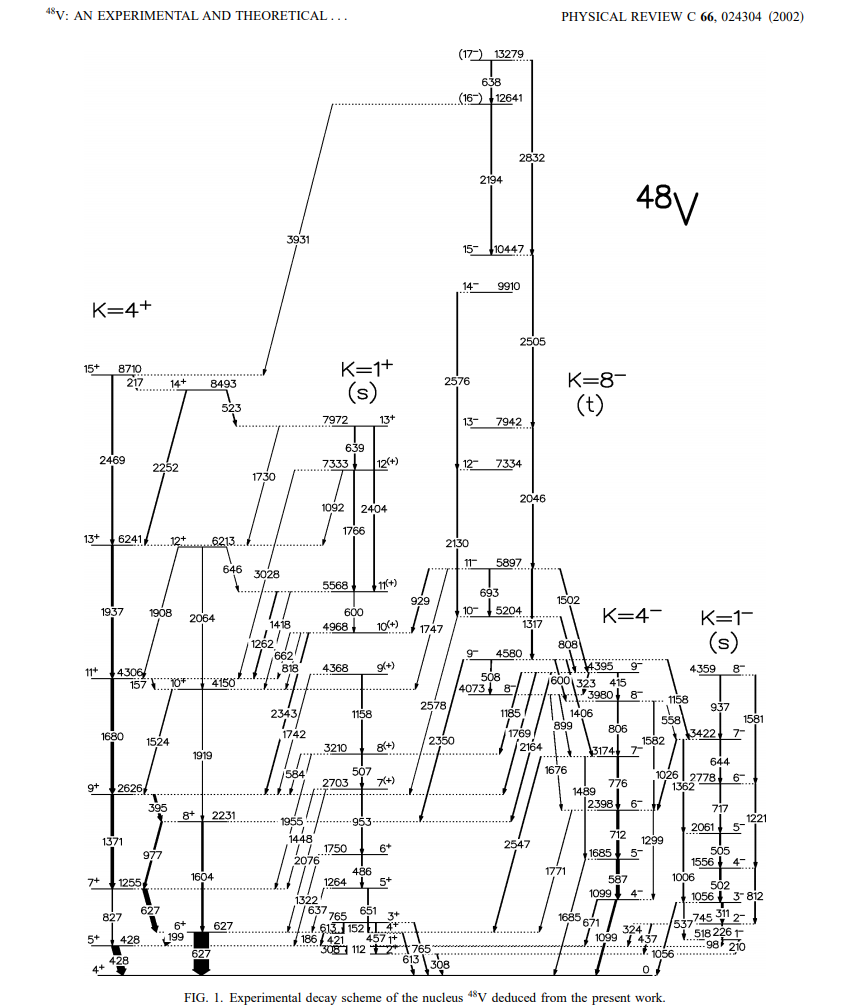

In [1]:
from IPython.display import Image
Image("image.png", width = 600, height = 300)

$^{48}V$ is a rotational nucleus, and a collective behaviour is of course expected. 

The ground state is a $4^+$ state, with $T_{1/2}: 15.9735 d$ (T. W. Burrows  Nucl. Data Sheets 107, 1747 (2006))

The spectrum shows 5 main bands, the g.s. band $K=4^+$, and the $K=1^+$ sideband (positive states), and the negative state bands: $K=8^-$, $K=4^-$, $K=1^-$. The low-spin levels of the g.s. band can be interpreted as built on a  $K=1^+$ bandhead generated by parallel coupling of the $\pi[321]3/2^-$ and $\nu[312]5/2^-$ Nilsson orbitals.
For the sake of the exercise, only positive parity states have been computed, as for negative parity ones one have to account the possible particle-hole excitation from the doubly closed sd-shell. 

So, let's focus on the first two positive parity bands.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import scipy.optimize as scopt

data = pd.read_excel("48V_sband.xlsx")
data.sort_values(by = "E_calc(MeV)", ascending = True)

,J,𝜋,K,E_calc(MeV),E_meas(MeV),Band
0,4,+,4,0.000,0.000,1
12,2,+,1,0.201,0.308,3
13,1,+,1,0.291,0.420,3
1,5,+,4,0.473,0.427,1
14,4,+,1,0.578,0.613,3
15,3,+,1,0.646,0.764,3
2,6,+,4,0.682,0.627,2
16,5,+,1,1.153,1.264,3
3,7,+,4,1.320,1.254,1
17,6,+,1,1.832,1.750,3


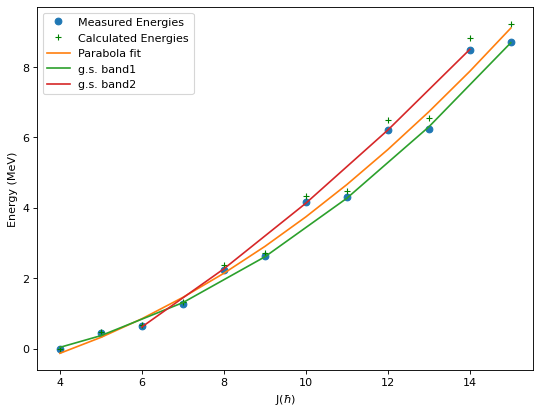

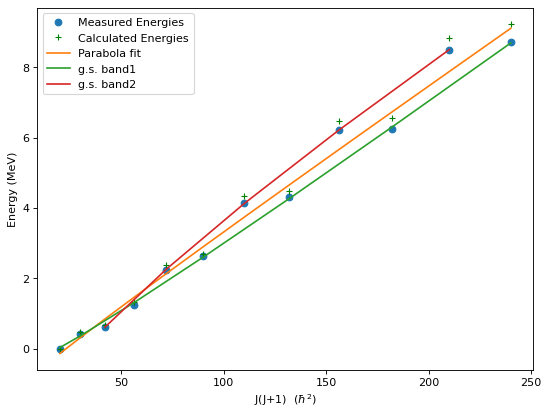

In [3]:
## data.sort_values(by = 'E_meas(MeV)')
def parabola(x, a, b, c):
    return a*x**2 + b*x + c
fit_params, pcov = scopt.curve_fit(parabola, data[data.K==4]["J"], data[data.K==4]["E_meas(MeV)"])
y_fit = parabola(data[data.K==4]["J"], *fit_params)

fit_params_B1, pcov_B1 = scopt.curve_fit(parabola, data[data.Band==1]["J"], data[data.Band==1]["E_meas(MeV)"])
y_fit_B1 = parabola(data[data.Band==1]["J"], *fit_params_B1)
fit_params_B2, pcov_B2 = scopt.curve_fit(parabola, data[data.Band==2]["J"], data[data.Band==2]["E_meas(MeV)"])
y_fit_B2 = parabola(data[data.Band==2]["J"], *fit_params_B2)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data[data.K==4]["J"], data[data.K==4]["E_meas(MeV)"], marker = 'o', linestyle = 'none', label = "Measured Energies")
plt.plot(data[data.K==4]["J"], data[data.K==4]["E_calc(MeV)"], marker = '+', color = 'green', linestyle = 'none', label = "Calculated Energies")
plt.plot(data[data.K==4]["J"], y_fit, label='Parabola fit')
plt.plot(data[data.Band==1]["J"], y_fit_B1, label='g.s. band1')
plt.plot(data[data.Band==2]["J"], y_fit_B2, label='g.s. band2')

plt.ylabel("Energy (MeV)")
plt.xlabel(r"J($\hbar$)")
plt.legend(loc = 'best')
plt.show()

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data[data.K==4]["J"]*(1+data[data.K==4]["J"]), data[data.K==4]["E_meas(MeV)"], marker = 'o', linestyle = 'none', label = "Measured Energies")
plt.plot(data[data.K==4]["J"]*(1+data[data.K==4]["J"]), data[data.K==4]["E_calc(MeV)"], marker = '+', color = 'green', linestyle = 'none', label = "Calculated Energies")
plt.plot(data[data.K==4]["J"]*(1+data[data.K==4]["J"]), y_fit, label='Parabola fit')
plt.plot(data[data.Band==1]["J"]*(data[data.Band==1]["J"]+1), y_fit_B1, label='g.s. band1')
plt.plot(data[data.Band==2]["J"]*(data[data.Band==2]["J"]+1), y_fit_B2, label='g.s. band2')
plt.ylabel("Energy (MeV)")
plt.xlabel(r"J(J+1)  ($\hbar^2$)")
plt.legend(loc = 'best')
plt.show()

As seen, the trend follows a quadratic function, which is typical of a rotational band. 


[0.24531868 0.38591209 0.62121379 0.95122378 1.37594206 1.89536863
 2.5095035  3.21834665 4.0218981  4.92015784 5.91312587 7.0008022
 8.18318681]


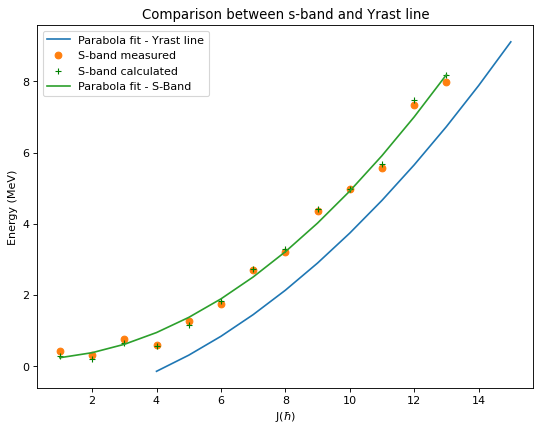

In [4]:
fit_params_sband, pcov_sband = scopt.curve_fit(parabola, data[data.K==1]["J"], data[data.K==1]["E_meas(MeV)"])
y_fit_sband = parabola(data[data.K==1]["J"], *fit_params_sband)
y_fit_sband= np.sort(y_fit_sband)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data[data.K==4]["J"], y_fit, label='Parabola fit - Yrast line')
plt.plot(data[data.K==1]["J"], data[data.K==1]["E_meas(MeV)"], marker = 'o', linestyle = 'none', label = "S-band measured")
plt.plot(data[data.K==1]["J"], data[data.K==1]["E_calc(MeV)"], marker = '+', color = 'green', linestyle = 'none', label = "S-band calculated")
plt.plot(np.sort(data[data.K==1]["J"]), y_fit_sband, label='Parabola fit - S-Band')


print(y_fit_sband)
plt.ylabel("Energy (MeV)")
plt.xlabel(r"J($\hbar$)")
plt.title("Comparison between s-band and Yrast line")
plt.legend(loc = 'best')
plt.show()

 While a K classification for this band appears reasonable at low spin, in
spite of the large signature splitting, this is not the case for
the almost spherical high-spin states.
The form of such states is proven to be spherical from the link between the spectroscopic quadrupole moment and the intrinsic quadrupole moment, from which we can calculate the deformation parameter $\beta$
$$Q_2 = Q_0 \frac{3K^2-I(I+1)}{(2I+3)(I+1)} $$
    $$Q_0 = \sqrt{\frac{16\pi}{5}} \frac{3}{4\pi}ZeR_0^2\beta$$

In [5]:
df_deformazioni = pd.read_excel("deformazione.xlsx")
df_deformazioni = df_deformazioni.drop("cost", axis = 1)
df_deformazioni

,eQ,I,K,beta
0,8.059,1,1,0.243390
1,-9.998,2,1,0.211364
2,-19.898,3,1,0.240376
3,41.006,4,4,0.243261
4,-22.772,4,1,0.222503
5,19.549,5,4,0.255839
6,-26.384,5,1,0.230193
7,4.776,6,4,0.252420
8,-12.308,6,1,0.100077
9,-4.988,7,4,0.256092


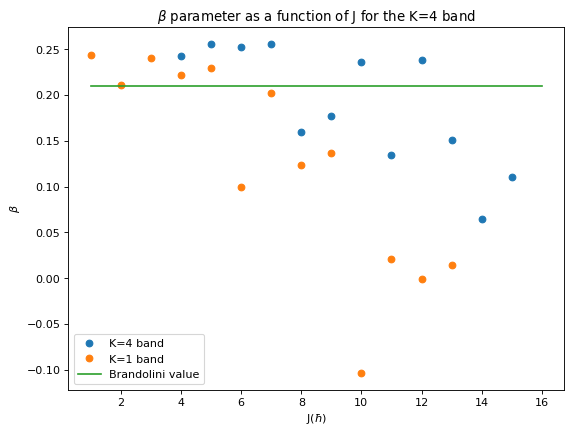

In [6]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_deformazioni.I[df_deformazioni.K==4], df_deformazioni.beta[df_deformazioni.K==4], marker = 'o', linestyle = 'None', label = 'K=4 band')
plt.plot(df_deformazioni.I[df_deformazioni.K==1], df_deformazioni.beta[df_deformazioni.K==1], marker = 'o', linestyle = 'None', label = 'K=1 band')

plt.xlabel(r"J($\hbar$)")
plt.ylabel(r"$\beta$")
plt.title(r"$\beta$ parameter as a function of J for the K=4 band")
x = np.linspace(1,16,100)
plt.plot(x,np.ones(100)*0.21, label = "Brandolini value")
plt.legend(loc = 'best')
plt.show()

The paper value is actually extracted from B(E2) values under the assumption of a $K^\pi = 4$ band

From the low lying states, we can observe that the defromation of $^{48}V$ can be represented by a $\beta \sim 0.2$ parameter. 

Moreover, we can also notice the small deformation of the high spin K=1 states.. 

Quoting: "While a K (=1) classification for this band appears reasonable at low spin, in
spite of the large signature splitting, this is not the case for
the almost spherical high-spin states."

Finally, our calculation show that the deformation values are similar to that of the  g.s.

I am reporting here only the M1 values that are actually reported as effectively measured in the nndc database. 

The deduced B(M1) rate is very large for the $15^+ \to 14^+$ transition and shows a staggering down to low spins, which is accompanied by a smooth behavior of the B(E2) values. Such a staggering behavior is related to the $1 f^n_{7/2}$ configuration space.

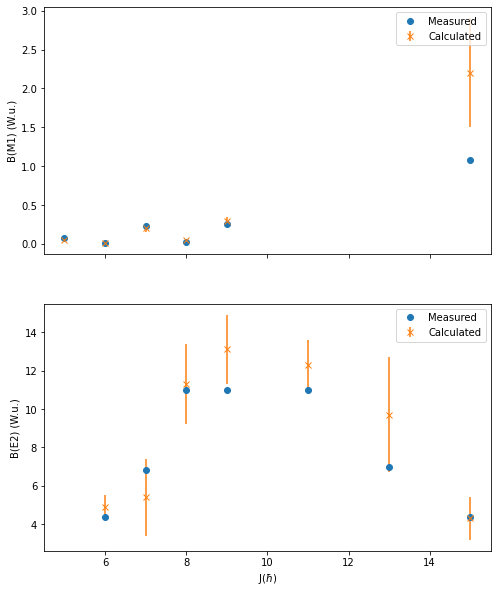

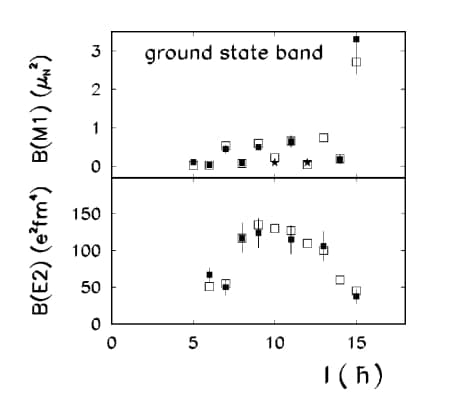

In [7]:
df_Tprob_K4 = pd.read_excel("BE2_k4band.xlsx")
df_K4_clean_M1 = df_Tprob_K4[df_Tprob_K4["B(M1)_sper"]!='x']
df_K4_clean_B2 = df_Tprob_K4[df_Tprob_K4["B(E2)_sper"]!='x']


fig, axs = plt.subplots(2, figsize=(8, 10),  sharex=True)

axs[1].plot(df_K4_clean_B2["J1"], df_K4_clean_B2["B(E2)_sper"], marker = 'o', linestyle = 'None', label = "Measured")
axs[1].errorbar(df_K4_clean_B2["J1"], df_K4_clean_B2["B(E2)_calc"], yerr = df_K4_clean_B2["( ) _sper"], marker = 'x', linestyle = 'None', label = "Calculated")
axs[1].legend(loc = 'best')
axs[1].set_ylabel(r"B(E2) (W.u.)")
axs[1].set_xlabel(r"J($\hbar$)")


axs[0].plot(df_K4_clean_M1["J1"], df_K4_clean_M1["B(M1)_calc"], marker = 'o', linestyle = 'None', label = "Measured")
axs[0].errorbar(df_K4_clean_M1["J1"], df_K4_clean_M1["B(M1)_sper"], yerr = df_K4_clean_M1["()_sper"], marker = 'x', linestyle = 'None', label = "Calculated")
axs[0].legend(loc = 'best')
axs[0].set_ylabel(r"B(M1) (W.u.)")
plt.show()


Image("TransitionRates.jpg", width = 600, height = 300)

---
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

-
-
-

-

-

-

-

-

-

-

-

-











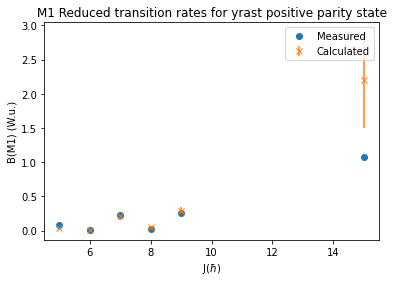

,J1,(E_i calc),Jf,E_f calc,B(E2)_calc,B(E2)_sper,( ) _sper,B(M1)_calc,B(M1)_sper,()_sper
0,5,0.472,4,0.000,19.9,x,x,0.08,0.045,0.008
2,6,0.682,5,0.472,18.2,x,x,0.01,0.015,0.003
4,7,1.319,6,0.682,13.4,x,x,0.23,0.21,0.06
6,8,2.371,7,1.319,5.6,x,x,0.03,0.053,0.01
8,9,2.704,8,2.371,8.3,x,x,0.26,0.29,0.05
27,15,9.227,14,8.831,1.2,x,x,1.08,2.2,0.7


In [8]:
df_Tprob_K4 = pd.read_excel("BE2_k4band.xlsx")
df_K4_clean_M1 = df_Tprob_K4[df_Tprob_K4["B(M1)_sper"]!='x']

plt.plot(df_K4_clean_M1["J1"], df_K4_clean_M1["B(M1)_calc"], marker = 'o', linestyle = 'None', label = "Measured")
# plt.plot(df_K4_clean["J1"], df_K4_clean["B(E2)_calc"], marker = '+', linestyle = 'None', label = "Calculated")
plt.errorbar(df_K4_clean_M1["J1"], df_K4_clean_M1["B(M1)_sper"], yerr = df_K4_clean_M1["()_sper"], marker = 'x', linestyle = 'None', label = "Calculated")
plt.legend(loc = 'best')
plt.xlabel(r"J($\hbar$)")
plt.ylabel(r"B(M1) (W.u.)")
plt.title("M1 Reduced transition rates for yrast positive parity state")
plt.show()
df_K4_clean_M1.iloc[:,:10]

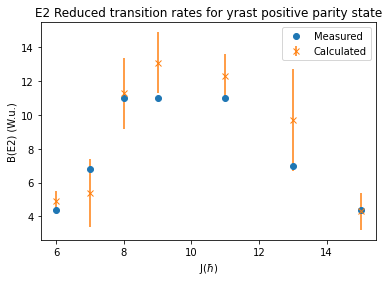

In [9]:
df_Tprob_K4 = pd.read_excel("BE2_k4band.xlsx")
#df_Tprob_K4["B(E2)_sper"].plot()

df_K4_clean_B2 = df_Tprob_K4[df_Tprob_K4["B(E2)_sper"]!='x']
plt.plot(df_K4_clean_B2["J1"], df_K4_clean_B2["B(E2)_sper"], marker = 'o', linestyle = 'None', label = "Measured")
# plt.plot(df_K4_clean["J1"], df_K4_clean["B(E2)_calc"], marker = '+', linestyle = 'None', label = "Calculated")
plt.errorbar(df_K4_clean_B2["J1"], df_K4_clean_B2["B(E2)_calc"], yerr = df_K4_clean_B2["( ) _sper"], marker = 'x', linestyle = 'None', label = "Calculated")
plt.legend(loc = 'best')
plt.xlabel(r"J($\hbar$)")
plt.ylabel(r"B(E2) (W.u.)")
plt.title("E2 Reduced transition rates for yrast positive parity state")
plt.show()
